## Introduction to Copulas

There are few statistical concepts one should be aware of before diving into the world of copulas. These are:
1. Probability Integral Transform (PIT)
2. Inverse Probability Integral Transform (IPIT)
3. Inverse Sampling

### Probability Integral Transform (PIT) and Inverse Probability Integral Transform (IPIT)

A random variable X of any distribution can be transformed into a uniform distribution using the following formula:
$$
U = F(X)
$$
where U is the uniform distribution and F is the cumulative distribution function (CDF) of X. This transformation is called the Probability Integral Transform (PIT). The inverse of this transformation is given by:
$$
X = F^{-1}(U)
$$
where $F^{-1}$ is the inverse of the CDF of X. This is called Inverse Probability Integral Transform (IPIT).
 

### Inverse Sampling
Inverse Sampling is a method to generate random samples from a given distribution. The method is as follows:
1. Generate a random sample from a uniform distribution.
2. Apply the inverse of the CDF of the distribution to the random sample to get a sample from the distribution.

In cases the CDF is not invertible, monte-carlo simulation can be used to generate samples from the distribution.

#### Beta distribution

Text(0.5, 1.0, 'Beta Distribution (Inverse Sampling)')

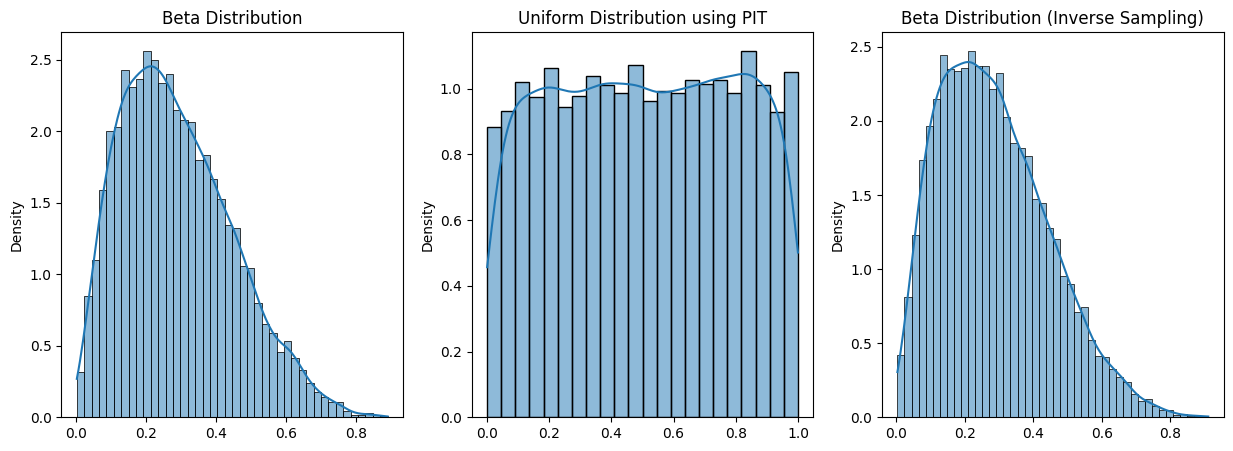

In [47]:
import numpy as np
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt

rs = np.random.RandomState(0)

# Generate random samples from a beta distribution
a = 2
b = 5
num_samples = 10_000
samples = rs.beta(a, b, size=num_samples)
uniform_dist = st.beta.cdf(samples, a = a, b = b)
samples_estimated = st.beta.ppf(rs.random(num_samples), a = a, b = b)

# Side by side histogram using seaborn
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(samples, kde=True, stat='density', ax=ax[0])
sns.histplot(uniform_dist, kde=True, stat='density', ax=ax[1])
sns.histplot(samples_estimated, kde=True, stat='density', ax=ax[2])

# Add titles
ax[0].set_title('Beta Distribution')
ax[1].set_title('Uniform Distribution using PIT')
ax[2].set_title('Beta Distribution (Inverse Sampling)')

#### Gamma distribution

Text(0.5, 1.0, 'Gamma Distribution (Inverse Sampling)')

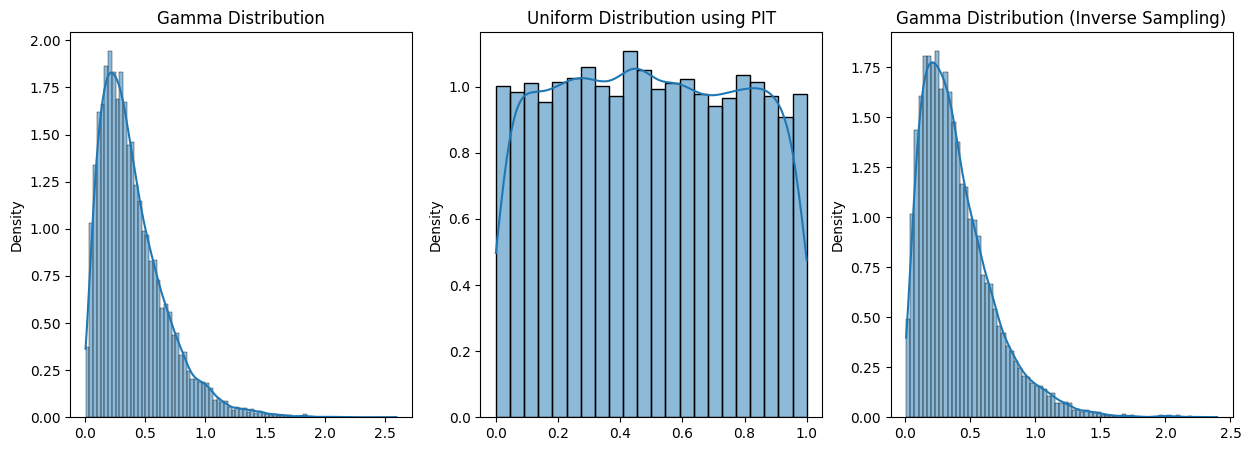

In [46]:
rs = np.random.RandomState(0)

# Generate random samples from a gamma distribution
alpha = 2
beta = 5

samples = rs.gamma(a, scale = 1 / beta, size=10000)
uniform_dist = st.gamma.cdf(samples, a, scale = 1/ beta)
samples_estimated = st.gamma.ppf(rs.random(num_samples), a, scale = 1/ beta)

# Side by side histogram using seaborn
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(samples, kde=True, stat='density', ax=ax[0])
sns.histplot(uniform_dist, kde=True, stat='density', ax=ax[1])
sns.histplot(samples_estimated, kde=True, stat='density', ax=ax[2])

# Add titles
ax[0].set_title('Gamma Distribution')
ax[1].set_title('Uniform Distribution using PIT')
ax[2].set_title('Gamma Distribution (Inverse Sampling)')

### Copulas

With the above basics out of the way, we are ready to dive into the world of copulas.

**When to use it?**
You have several random variables each with their own marginal distribution and you want to model the dependence structure between them. This can be done using copulas.

A useful theorem which has practical implications in the world of copulas is  which states that any multivariate distribution can be decomposed into its marginal distributions and a copula that captures the dependence structure between the variables.

**Sklar's Theorem**
This theorem says that any multivariate distribution can be expressed using Copulas. The theorem is as follows:

Let x be a random vector with n components where $x = (x_1, x_2, ..., x_n)$. Let $F$ be the joint distribution of $\mathbf{x}$ and $F_1, F_2, ..., F_n$ be the marginal distribution functions of the components of x. Then, there exists a copula C such that:
$$
F(x_1, x_2, ..., x_n) = C(F_1(x_1), F_2(x_2), ..., F_n(x_n))
$$

***Decoding the RHS of the above equation***

$$\mathbf{u} = (u_1, u_2, \ldots, u_n)$$ where $u_i = F_i(x_i)$

\begin{equation}
\begin{aligned}
C(F_1(x_1), F_2(x_2), \ldots, F_N(x_N))  &= C(u_1, u_2, \ldots, u_n) \\
&= C(\mathbf{u}) \\
&= P[U_1 \leq u_1, U_2 \leq u_2, \ldots, U_N \leq u_N]
\end{aligned}
\end{equation}
where $\mathbf{u}$ is vector of uniform random variables computed using the PIT. In case of a Gaussian copula, $P \sim N(\mu, \Sigma)$. 
**Note:** $u_i$ needs to be transformed to the marginals of the multivariate Gaussian distribution using the IPIT for the Gaussian copula.

As you can see, ***A Copula is just a multivariable CDF with uniform marginals.***


### Gaussian Copula

General equation of a copula is as follows:

\begin{equation}
\begin{aligned}
C(u_1, u_2)  &= P(U_1 \leq u_1, U_2 \leq u_2) 
\end{aligned}
\end{equation}

For a bi-variate gaussian distribution, $P \sim N(\mu, \Sigma)$, the copula is given by:

\begin{equation}
\begin{aligned}
P(U_1 \leq u_1, U_2 \leq u_2)   &= P_{X \sim N(\mu, \Sigma)}(X_1 \leq F_1^{-1}(u_1), X_2 \leq F_2^{-1}(u_2)) \\
\end{aligned}
\end{equation}

The marginals of a multivariate Gaussian distribution are also Gaussian. Hence, using IPIT, we can transform the uniform marginals to Gaussian marginals.
$F_1, F_2$ are the CDFs Gaussian distribution(marginals of the multivariate Gaussian distribution).

### Example: Gaussian Copula with Beta and Gamma marginals

#### Step 1: Generate random samples from Beta and Gamma distributions

<Figure size 1000x500 with 0 Axes>

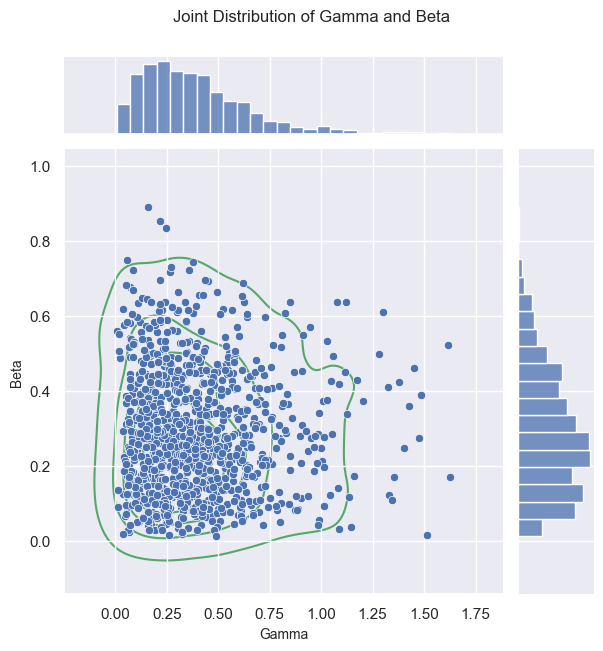

In [80]:
rs = np.random.RandomState(0)

num_samples = 1_000
gamma_a, gamma_b = 2, 5
beta_a, beta_b = 2, 5

gamma_samples = rs.gamma(gamma_a, scale = 1 / gamma_b, size=num_samples)
beta_samples = rs.beta(beta_a, beta_b, size=num_samples)

fig = plt.figure(figsize=(10, 5))
jp = sns.jointplot(x=gamma_samples, y=beta_samples)
jp.set_axis_labels('Gamma', 'Beta', fontsize=10)
jp.fig.suptitle('Joint Distribution of Gamma and Beta', fontsize=12, y=1.05)
jp.plot_joint(sns.kdeplot, color='g', zorder=0, levels=6)

#### Step 2: Transform the samples to uniform marginals

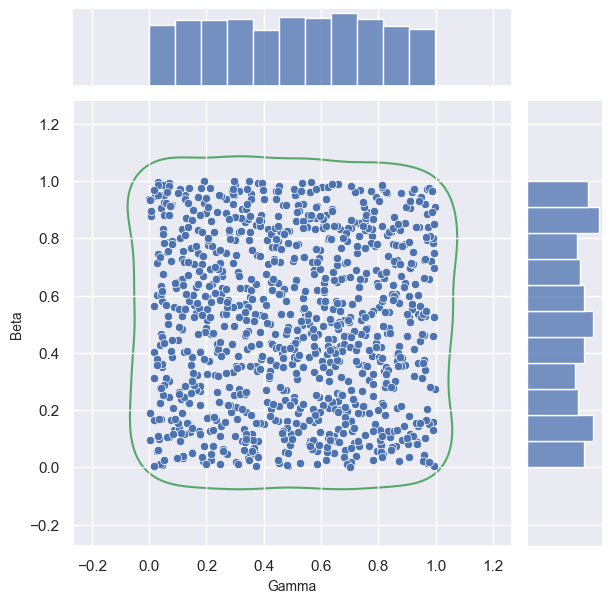

In [83]:
# Transform the samples to uniform marginals
gamma_uniform = st.gamma.cdf(gamma_samples, gamma_a, scale = 1/ gamma_b)
beta_uniform = st.beta.cdf(beta_samples, beta_a, beta_b)

jp = sns.jointplot(x=gamma_uniform, y=beta_uniform)
jp.set_axis_labels('Gamma', 'Beta', fontsize=10)
jp.plot_joint(sns.kdeplot, color='g', zorder=0, levels=1)

#### Step 3: Compute the Gaussian Copula using the transformed samples

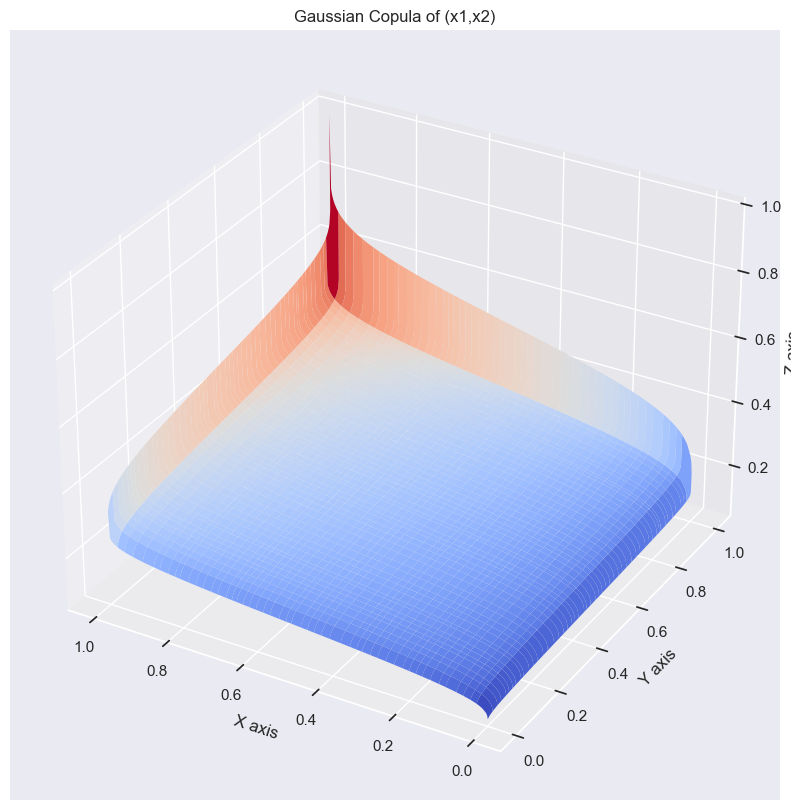

In [126]:
from matplotlib import cm

X = np.hstack([gamma_samples.reshape(-1, 1), beta_samples.reshape(-1, 1)]) # Variables are column-wise and samples are row-wise

# This is one way to calculate the mean and co-variance of the Gaussian copula.
Mu = np.mean(X, axis=0).reshape(1, -1)
Sigma = np.cov(X, rowvar=False, ddof=1)

# Transform uniform marginals to marginals of the Gaussian copula which itself is Gaussian. 
# The u1 and u2 need to be sorted for plotting.
u1=np.sort(gamma_uniform)
u2=np.sort(beta_uniform)

# Add 1 as the last element to convert (0, 1) to (0, 1]
u1[-1]=1
u2[-1]=1

# Inverting u1 and u2, preserves the sorted order of elements
x1=st.norm.ppf(u1, loc = Mu[0][0], scale = Sigma[0][0]).reshape(-1, 1)
x2=st.norm.ppf(u2, loc = Mu[0][1], scale = Sigma[1][1]).reshape(-1, 1)

xx, yy = np.meshgrid(x1, x2)

z_shape = xx.shape + (2,)
z = np.empty(z_shape)
z[:, : , 0] = xx
z[:, : , 1] = yy

# Compute CDF for xx and yy
z = st.multivariate_normal(Mu[0], Sigma).cdf(z) # This is the value of copula at the grid points

xx, yy = np.meshgrid(u1, u2)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(xx, yy, z, cmap=cm.coolwarm, linewidth=0, )
ax.invert_xaxis()
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('Gaussian Copula of (x1,x2)')
plt.show()

### Gaussian Copula when marginal distribution is not known

In cases where the marginal distribution is not known, we can use the empirical CDF to transform the samples to uniform marginals

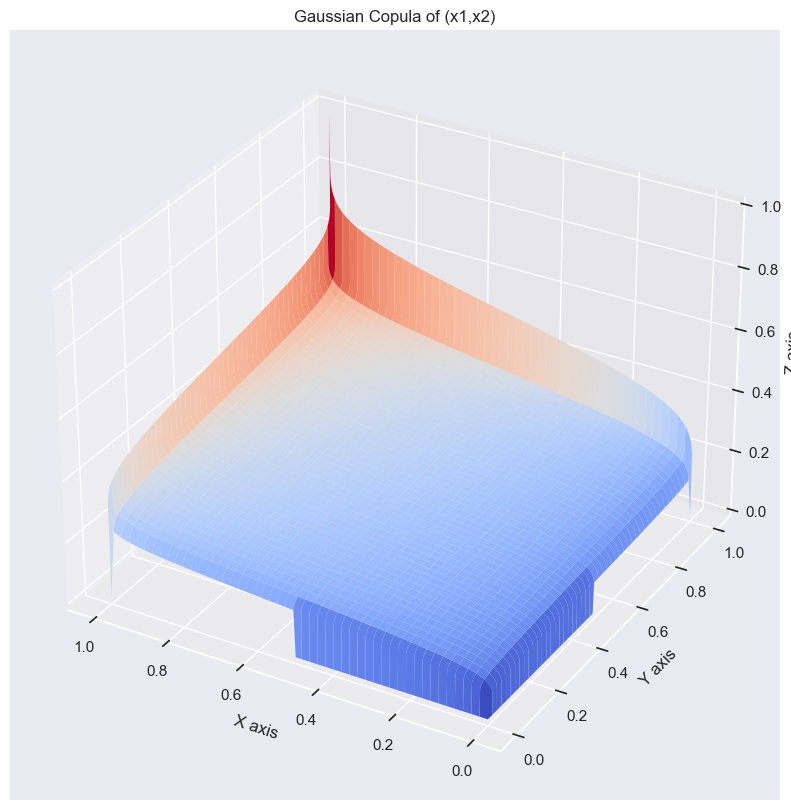

In [131]:
from statsmodels.distributions.empirical_distribution import ECDF

gamma_ecdf = ECDF(gamma_samples) # uniform marginal u1
beta_ecdf = ECDF(beta_samples)  # uniform marginal u2

u1 = gamma_ecdf.y
u2 = beta_ecdf.y

x1=st.norm.ppf(u1, loc = Mu[0][0], scale = Sigma[0][0]).reshape(-1, 1)
x2=st.norm.ppf(u2, loc = Mu[0][1], scale = Sigma[1][1]).reshape(-1, 1)

xx, yy = np.meshgrid(x1, x2)

z_shape = xx.shape + (2,)
z = np.empty(z_shape)
z[:, : , 0] = xx
z[:, : , 1] = yy

# Compute CDF for xx and yy
z = st.multivariate_normal(Mu[0], Sigma).cdf(z) # This is the value of copula at the grid points

xx, yy = np.meshgrid(u1, u2)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(xx, yy, z, cmap=cm.coolwarm, linewidth=0, )
ax.invert_xaxis()
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('Gaussian Copula of (x1,x2)')
plt.show()

### Generating random samples which are correlated using Gaussian Copula

**Steps:**

1. Draw samples from the multivariate Gaussian Copula. The samples will be correlated
2. Transform the gaussian marginals to uniform marginals using PIT
3. Transform the uniform marginals to marginals of the beta and gamma distribution using IPIT

In the below example, we compare the joint distribution of 2 stocks with randomly sampled which are correlated using the Gaussian copula. Both of them should be similar. 

Text(0.5, 1.05, 'Joint Distribution of Stock 1 and Stock 2')

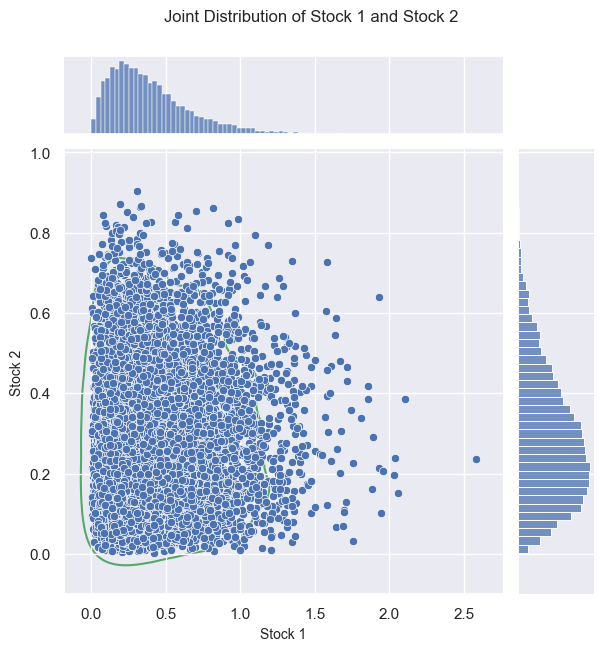

In [156]:
# 2 stocks with beta and gamma distribution with 1000 samples
num_samples = 10_000
gamma_a, gamma_b = 2, 5
beta_a, beta_b = 2, 5

gamma_samples = rs.gamma(gamma_a, scale = 1 / gamma_b, size=num_samples)
beta_samples = rs.beta(beta_a, beta_b, size=num_samples)

R = np.hstack([gamma_samples.reshape(-1, 1), beta_samples.reshape(-1, 1)])

jp = sns.jointplot(x=R[:, 0], y=R[:, 1])
jp.plot_joint(sns.kdeplot, color='g', zorder=0, levels=1)
jp.set_axis_labels('Stock 1', 'Stock 2', fontsize=10)
jp.fig.suptitle('Joint Distribution of Stock 1 and Stock 2', fontsize=12, y=1.05)

Text(0.5, 1.05, 'Joint Distribution of samples')

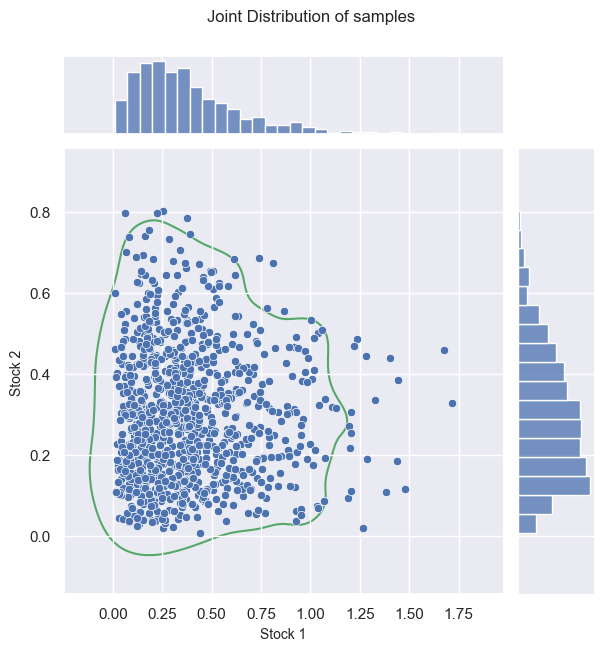

In [159]:
Mu = np.mean(R, axis=0)
Std = np.std(R, axis=0)

Sigma = np.cov(R, rowvar=False, ddof=1)
#Sigma = np.clip(Sigma + 0.5, 0, 1) # Stress testing the covariance matrix

# Assuming a Gaussian copula, draw samples from the multivariate Gaussian distribution
copula_samples = rs.multivariate_normal(Mu, Sigma, size=1000)

u1 = st.norm.cdf(copula_samples[:, 0], loc = Mu[0], scale = Std[0])
u2 = st.norm.cdf(copula_samples[:, 1], loc = Mu[1], scale = Std[1])

# Convert uniform marginals to marginals of the beta and gamma distribution
x1 = st.gamma.ppf(u1, gamma_a, scale = 1 / gamma_b)
x2 = st.beta.ppf(u2, beta_a, beta_b)

jp = sns.jointplot(x=x1, y=x2)
jp.plot_joint(sns.kdeplot, color='g', zorder=0, levels=1)
jp.set_axis_labels('Stock 1', 'Stock 2', fontsize=10)
jp.fig.suptitle('Joint Distribution of samples', fontsize=12, y=1.05)